In [10]:
import numpy as np
import pandas as pd


In [57]:
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

# Portfolio

In [14]:
tickers = ['COF', 'GLD', 'RY', 'AAPL', 'FFH.TO', 'ACB', 'TTWO', 'TEAM', 'VGRO.TO'] 
pf = pd.DataFrame()
for t in tickers:
    pf[t] = wb.DataReader(t, data_source='yahoo', start = '2017-1-1')['Adj Close']




In [15]:
pf.head()

,COF,GLD,RY,AAPL,FFH.TO,ACB,TTWO,TEAM,VGRO.TO
Date,,,,,,,,,
2017-01-03,83.771164,110.470001,59.900360,110.953873,620.096313,1.780,49.220001,24.600000,NaN
2017-01-04,85.119118,110.860001,61.333275,110.829704,615.460388,1.820,50.139999,25.150000,NaN
2017-01-05,83.309265,112.580002,61.605782,111.393303,611.181763,1.860,49.360001,24.969999,NaN
2017-01-06,83.516640,111.750000,61.596996,112.635139,603.677734,1.860,49.950001,24.719999,NaN
2017-01-09,82.423195,112.669998,61.482700,113.666824,597.537170,1.962,50.459999,25.030001,NaN


# Current Stock Prices

In [16]:
pf.iloc[-1]

COF        100.010002
GLD        137.860001
RY          81.750000
AAPL       267.250000
FFH.TO     600.010010
ACB          2.500000
TTWO       121.349998
TEAM       127.110001
VGRO.TO     26.680000
Name: 2019-11-29 00:00:00, dtype: float64

# Stock Price at Beginning on Dataset

In [17]:
pf.iloc[0]

COF         83.771164
GLD        110.470001
RY          59.900360
AAPL       110.953873
FFH.TO     620.096313
ACB          1.780000
TTWO        49.220001
TEAM        24.600000
VGRO.TO           NaN
Name: 2017-01-03 00:00:00, dtype: float64

# Normalization


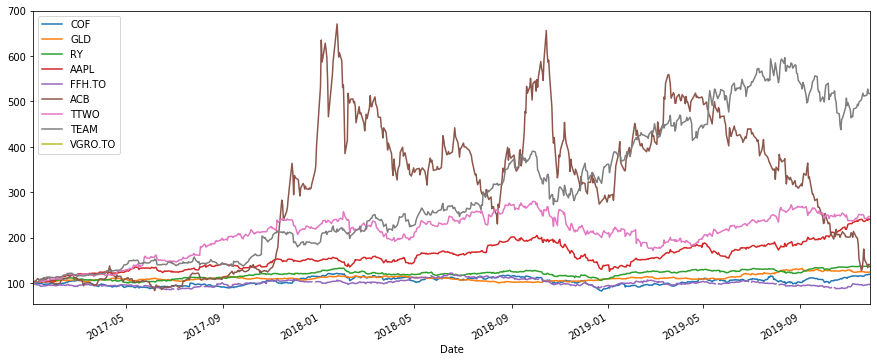

In [18]:
(pf/ pf.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

# Simple Return

In [25]:
returns = (pf / pf.shift(1)) - 1
returns.head()


,COF,GLD,RY,AAPL,FFH.TO,ACB,TTWO,TEAM,VGRO.TO
Date,,,,,,,,,
2019-11-22,0.013744,-0.001884,0.000122,-0.000878,0.008407,-0.134615,-0.024971,0.000079,0.000378
2019-11-25,0.017941,-0.004792,0.000243,0.017534,0.005160,-0.066667,-0.001004,0.004207,0.006800
2019-11-26,-0.006409,0.004815,-0.004622,-0.007809,0.004933,-0.051587,0.009048,0.025294,0.000000
2019-11-27,0.010381,-0.005300,0.001100,0.013432,0.009934,0.054393,0.009465,-0.017038,0.003377
2019-11-29,-0.002394,0.006204,-0.002197,-0.002203,-0.011434,-0.007937,-0.001892,-0.003059,-0.002244


# Log Return

In [30]:
log_ret = np.log(pf / pf.shift(1))
log_ret.head()

,COF,GLD,RY,AAPL,FFH.TO,ACB,TTWO,TEAM,VGRO.TO
Date,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.015963,0.003524,0.023640,-0.001120,-0.007504,0.022223,0.018519,0.022111,NaN
2017-01-05,-0.021492,0.015396,0.004433,0.005072,-0.006976,0.021740,-0.015679,-0.007183,NaN
2017-01-06,0.002486,-0.007400,-0.000143,0.011087,-0.012354,0.000000,0.011882,-0.010062,NaN
2017-01-09,-0.013179,0.008199,-0.001857,0.009118,-0.010224,0.053388,0.010158,0.012463,NaN


# Measuring Risk 

In [31]:
log_ret.mean()

COF        0.000242
GLD        0.000303
RY         0.000425
AAPL       0.001201
FFH.TO    -0.000012
ACB        0.000464
TTWO       0.001233
TEAM       0.002244
VGRO.TO    0.000189
dtype: float64

In [32]:
log_ret.mean()*250 #annual 

COF        0.060513
GLD        0.075647
RY         0.106210
AAPL       0.300229
FFH.TO    -0.003053
ACB        0.116010
TTWO       0.308189
TEAM       0.560897
VGRO.TO    0.047345
dtype: float64

In [33]:
log_ret.std()

COF        0.014644
GLD        0.006640
RY         0.008074
AAPL       0.015693
FFH.TO     0.012588
ACB        0.049681
TTWO       0.022379
TEAM       0.025637
VGRO.TO    0.005478
dtype: float64

In [34]:
log_ret.std() * 250 ** 0.5

COF        0.231536
GLD        0.104991
RY         0.127662
AAPL       0.248132
FFH.TO     0.199031
ACB        0.785519
TTWO       0.353847
TEAM       0.405364
VGRO.TO    0.086610
dtype: float64

# Calculating Covariance

In [37]:
cov_matrix=log_ret.cov()*250 #annualized
cov_matrix

,COF,GLD,RY,AAPL,FFH.TO,ACB,TTWO,TEAM,VGRO.TO
COF,0.053609,-0.005668,0.014988,0.023817,0.006967,0.018125,0.022179,0.018127,0.012502
GLD,-0.005668,0.011023,-0.000380,-0.003363,-0.001719,0.001056,-0.000745,-0.001822,-0.001444
RY,0.014988,-0.000380,0.016298,0.012900,0.005173,0.016789,0.011797,0.011214,0.006067
AAPL,0.023817,-0.003363,0.012900,0.061569,0.009884,0.024726,0.035478,0.037346,0.014241
FFH.TO,0.006967,-0.001719,0.005173,0.009884,0.039613,0.005541,0.004182,0.009472,0.004908
ACB,0.018125,0.001056,0.016789,0.024726,0.005541,0.617041,0.040318,0.045133,0.008601
TTWO,0.022179,-0.000745,0.011797,0.035478,0.004182,0.040318,0.125208,0.060291,0.015010
TEAM,0.018127,-0.001822,0.011214,0.037346,0.009472,0.045133,0.060291,0.164320,0.015537
VGRO.TO,0.012502,-0.001444,0.006067,0.014241,0.004908,0.008601,0.015010,0.015537,0.007501


# PF weights

In [22]:
weights = np.array([15,6,5,1.5,6,5,6,5,4])
weights = weights / np.sum(weights)
weights

array([0.28037383, 0.11214953, 0.09345794, 0.02803738, 0.11214953,
       0.09345794, 0.11214953, 0.09345794, 0.07476636])

# PF Return 

In [38]:
np.dot(log_ret, weights) # calculate matrix and vector 

array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,  

In [54]:
annual_returns = log_ret.mean() * 250
annual_returns

COF        0.060513
GLD        0.075647
RY         0.106210
AAPL       0.300229
FFH.TO    -0.003053
ACB        0.116010
TTWO       0.308189
TEAM       0.560897
VGRO.TO    0.047345
dtype: float64

In [55]:
np.dot(annual_returns, weights)

0.144816873314421

In [56]:
pfolio = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio)


14.482000000000001 %


# Calculating Portfolio Risk 

In [41]:
pfolio_var = np.dot(weights.T, np.dot(log_ret.cov() * 250, weights))
pfolio_var

0.024068528827506597

In [42]:
pfolio_vol = (np.dot(weights.T, np.dot(log_ret.cov() * 250, weights))) ** 0.5
pfolio_vol

0.15514035202843454

In [43]:
print (str(round(pfolio_vol, 5) * 100) + ' %')

15.514 %


# Portfolio Optimization

## Correlations

In [58]:
log_ret.corr()

,COF,GLD,RY,AAPL,FFH.TO,ACB,TTWO,TEAM,VGRO.TO
COF,1.000000,-0.233148,0.507054,0.414565,0.151252,0.099656,0.270707,0.193137,0.585273
GLD,-0.233148,1.000000,-0.028361,-0.129084,-0.083401,0.012810,-0.020042,-0.042814,-0.155765
RY,0.507054,-0.028361,1.000000,0.407227,0.204277,0.167423,0.261162,0.216694,0.526911
AAPL,0.414565,-0.129084,0.407227,1.000000,0.202805,0.126855,0.404078,0.371291,0.590015
FFH.TO,0.151252,-0.083401,0.204277,0.202805,1.000000,0.035313,0.060133,0.117455,0.271757
ACB,0.099656,0.012810,0.167423,0.126855,0.035313,1.000000,0.145054,0.141740,0.125058
TTWO,0.270707,-0.020042,0.261162,0.404078,0.060133,0.145054,1.000000,0.420332,0.460076
TEAM,0.193137,-0.042814,0.216694,0.371291,0.117455,0.141740,0.420332,1.000000,0.418234
VGRO.TO,0.585273,-0.155765,0.526911,0.590015,0.271757,0.125058,0.460076,0.418234,1.000000


In [61]:
num_assets = len(tickers)
num_assets

9

## Develop Random Weights 

In [64]:
rand_weights = np.random.random(num_assets)
rand_weights /= np.sum(rand_weights)
rand_weights

array([0.03244221, 0.19934239, 0.07643047, 0.25117967, 0.24457575,
       0.03146883, 0.03840953, 0.10497271, 0.02117844])

In [ ]:
np.sum(rand_weights)

## Expected Portfolio Return

In [66]:
np.sum(rand_weights*log_ret.mean()*250)

0.17519490107588495

## Expected Portfolio Var

In [67]:
np.dot(rand_weights.T, np.dot(log_ret.cov() * 250, rand_weights))

0.01672050191083491

## Expected Portfolio Vol

In [68]:
np.sqrt(np.dot(rand_weights.T,np.dot(log_ret.cov() * 250, rand_weights)))

0.12930777977691407

# Function for Monte Carlo Simulation

In [80]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (100000):
    rand_weights = np.random.random(num_assets)
    rand_weights /= np.sum(rand_weights)
    pfolio_returns.append(np.sum(rand_weights * log_ret.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(rand_weights.T,np.dot(log_ret.cov() * 250, rand_weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)    
    
pfolio_returns, pfolio_volatilities

(array([0.13181131, 0.18233269, 0.12929651, ..., 0.20096395, 0.17437603,
        0.19697104]),
 array([0.11522968, 0.14216597, 0.18855022, ..., 0.22072441, 0.20955993,
        0.17621516]))

In [81]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [82]:
portfolios.head()

,Return,Volatility
0,0.131811,0.115230
1,0.182333,0.142166
2,0.129297,0.188550
3,0.102298,0.123793
4,0.168574,0.185950


Text(0, 0.5, 'Expected Return')

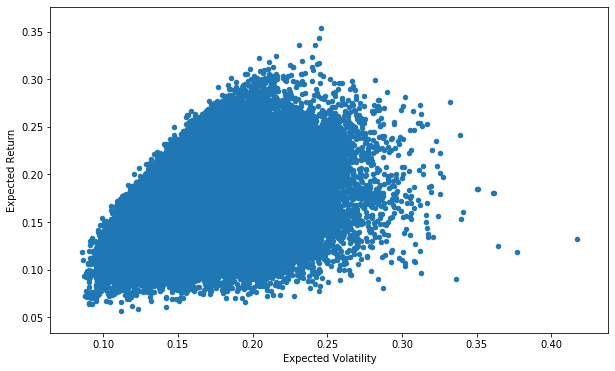

In [83]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')